In [2]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv("Salary_dataset.csv")

In [4]:
data.head(2)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0


In [5]:
data.drop(columns=["Unnamed: 0"])

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [6]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [12]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(criterion='squared_error' ,max_depth=5)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
X_train ,X_test ,y_train ,y_test=train_test_split(X ,y, test_size=0.2 ,random_state=0)

In [14]:
model=tree.fit(X_train ,y_train)

[Text(0.48660714285714285, 0.9166666666666666, 'x[0] <= 16.5\nsquared_error = 614737637.832\nsamples = 24\nvalue = 73887.208'),
 Text(0.19642857142857142, 0.75, 'x[0] <= 4.5\nsquared_error = 81200345.857\nsamples = 14\nvalue = 54977.0'),
 Text(0.34151785714285715, 0.8333333333333333, 'True  '),
 Text(0.07142857142857142, 0.5833333333333334, 'x[0] <= 0.5\nsquared_error = 7820714.0\nsamples = 4\nvalue = 42242.0'),
 Text(0.03571428571428571, 0.4166666666666667, 'squared_error = 0.0\nsamples = 1\nvalue = 39344.0'),
 Text(0.10714285714285714, 0.4166666666666667, 'x[1] <= 2.2\nsquared_error = 6694994.667\nsamples = 3\nvalue = 43208.0'),
 Text(0.07142857142857142, 0.25, 'x[0] <= 2.0\nsquared_error = 1795600.0\nsamples = 2\nvalue = 44866.0'),
 Text(0.03571428571428571, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 46206.0'),
 Text(0.10714285714285714, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 43526.0'),
 Text(0.14285714285714285, 0.25, 'squared_error = 0

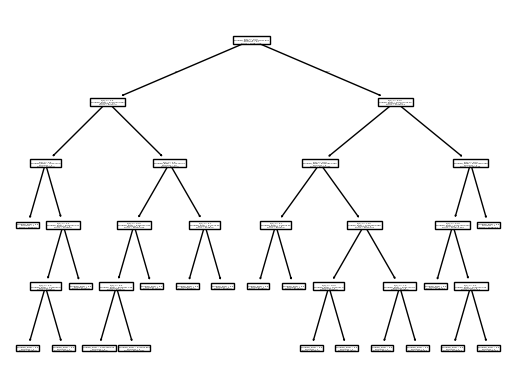

In [41]:
plot_tree(tree, max_depth=5)

In [15]:
y_pred=model.predict(X_test)
r2_score(y_pred ,y_test)

0.9544225395972772

In [36]:
from sklearn.tree import plot_tree

In [17]:
from sklearn.linear_model import LinearRegression
re=LinearRegression()
model1=re.fit(X_train ,y_train)
y_pred1=model1.predict(X_test)
r2_score(y_pred1 ,y_test)

0.9882032418995862

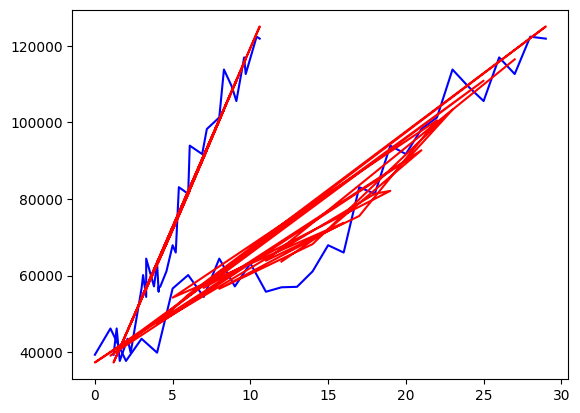

In [23]:
import matplotlib.pyplot as plt
plt.plot(X,y ,color='b')
plt.plot(X_train ,model1.predict(X_train) ,color="r")
plt.show()

In [29]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}


In [30]:
cv=GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid ,cv=10 )

In [31]:
cv.fit(X_train ,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [32]:
cv.best_estimator_

DecisionTreeRegressor(max_features=0.5, min_samples_split=0.25)

In [33]:
cv.best_score_

np.float64(-0.2370739146251295)

In [34]:
cv.best_params_

{'max_depth': None, 'max_features': 0.5, 'min_samples_split': 0.25}

In [54]:
data1=pd.read_csv("Social_Network_Ads.csv")

In [55]:
data1.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [56]:
data2=data1.drop(columns=["User ID"])

In [57]:
X1=data2.iloc[:,:-1].values
y1=data2.iloc[:,-1].values

In [58]:
X1.shape

(400, 3)

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X1[:,0]=le.fit_transform(X1[:,0])

In [60]:
X_train_clf ,X_test_clf ,y_train_clf ,y_test_clf=train_test_split(X1 ,y1, test_size=0.2 ,random_state=0)

In [66]:

from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=10 , min_samples_split=3,max_leaf_nodes=3)
model2=clf.fit(X_train_clf ,y_train_clf)
y_pred2=model2.predict(X_test_clf)


In [67]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_pred2 ,y_test_clf))
print("____________________________")
classification_report(y_pred2 , y_test_clf)

0.95
____________________________


'              precision    recall  f1-score   support\n\n           0       0.95      0.98      0.96        56\n           1       0.95      0.88      0.91        24\n\n    accuracy                           0.95        80\n   macro avg       0.95      0.93      0.94        80\nweighted avg       0.95      0.95      0.95        80\n'